R² = 0.9991079964221486
Y = 48.04248730543552 * e^(--0.08846087495521651 * x) + -27.647749272641995
Tau = -565.2216307527209 µs


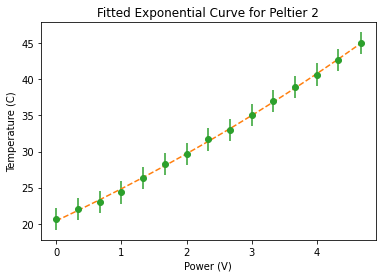

In [14]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd #allows for data manipulation

g = pd.DataFrame({('bits'):[0, 17, 34, 51, 68, 85, 102, 119, 136, 153, 170, 187, 204, 221, 238],
                  ('volts'):[0, 0.33, 0.67, 1.0, 1.33, 1.67, 2.0, 2.33, 2.67, 3.0, 3.33, 3.67, 4.0, 4.33, 4.67],
                  ('y'):[20.67, 22, 23, 24.33, 26.33, 28.33, 29.67, 31.67, 33, 35, 37, 39, 40.67, 42.67, 45]})


def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b
# perform the fit
p0 = (0.01, 0.01, 0) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, g.volts, g.y,p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(g.y - monoExp(g.volts, m, t, b))
squaredDiffsFromMean = np.square(g.y - np.mean(g.y))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(g.volts, g.y, '.', label="data")
plt.plot(g.volts, monoExp(g.volts, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve for Peltier 2")
plt.xlabel("Power (V)")
plt.ylabel("Temperature (C)")
plt.errorbar(g.volts,g.y, yerr = 1.53,fmt="o")




# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
print(f"Tau = {tauSec * 1e6} µs")
